In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame

In [2]:
df_chunk = pd.read_csv('transaction.csv', chunksize=1000000, iterator = True) #使用chunksize分块读取大型csv文件，这里每次读取chunksize为100万

chunk_list = [] 

for chunk in df_chunk:
    chunk_list.append(chunk)

df = pd.concat(chunk_list) #再把这些块组合成一个DataFrame
df.shape
df


,tx_hash,block_num,from_addr,to_addr,amount
0,0x4372648d4742446b1efe06f8e27eee2928cd37418a6a...,5358831,0xee1087889193c4acc92c5bfec090c0a43a7b132f,0xea355aefd533a5df887d8f6d16da75373d260719,10998620000000000000
1,0x4631a157efb62403573051be989b8e4e02a846e03db8...,5358831,0x30146933a3a0babc74ec0b3403bec69281ba5914,0x52146615ac40deebd6913d05e8b6fbfec2858dab,430000000000000000
2,0xf6ba7bb5a91d70765542eadeaf6688f2ee1dbc65876a...,5358831,0x30146933a3a0babc74ec0b3403bec69281ba5914,0xb38142943607d6fcef5932777d2286831fbe8fca,1507000000000000000
3,0xd9013be05615e68347fcb1751dfef6ae8c271d6a6dd8...,5358831,0x30146933a3a0babc74ec0b3403bec69281ba5914,0x852b13174d30ffda834db573bfb00fec955b43e8,129800000000000000
4,0x76f9a7e8b09e04854819b4208ed0a18ad99fb1ff5c06...,5358831,0x79fb89a976c831a903992a9166ea1a3102b0caef,0x7f5f2922a21b0e9a63d9ec94882ef612a8e01f0a,45286632431887000
...,...,...,...,...,...
10779102,0xd4585b8eeff60772d7ab429f2e6e4586e78d2d7430ff...,5535804,0xddd3fc4a0f9e3f2a966609f8a329900cb30a4eaa,0xea982934a654c7fb391babc5e92286e7acfb059e,36487000000000000
10779103,0x440673c013684d99412bca3f4a923126f637f7896d63...,5535804,0xad68942a95fdd56594aa5cf862b358790e37834c,0x456150c08ad4ae665c1012aae582b778ce8c145c,111357000000000
10779104,0x6a57e561593c21e9832a3b16667c6da47b3491d55992...,5535804,0x29496e4c1ee9d6ea923af1ddfe872c1393605827,0xf683306b7607cc8eed34555e5fd69717dc96373b,300000000000000
10779105,0xee0ae70d6451014283573da62b8fad4f6a3ff8cfcf70...,5535804,0x96dd3a75fe4495ad71065205c1a37785390a26b6,0xc28e860c9132d55a184f9af53fc85e90aa3a0153,122000000000000000


In [3]:
# add one more column "time" to the data frame


df_chunk2 = pd.read_csv('block.csv', chunksize=1000000, iterator = True) #使用chunksize分块读取大型csv文件，这里每次读取chunksize为100万

chunk_list2 = [] 

for chunk in df_chunk2:
    chunk_list2.append(chunk)

df_block = pd.concat(chunk_list2) #再把这些块组合成一个DataFrame
df_block.rename(columns = {'num':'block_num'}, inplace = True)
df_block.shape
df_block

,block_num,block_time,block_hash
0,5358831,1522555204,0x3b1829fa77d30161b04e3a6c9d914ad17c39e0699fee...
1,5358832,1522555210,0x8409bb2ae5eeb1679d7098be3ccfb43bcb848461ecd8...
2,5358833,1522555234,0x4ed77dd79702776f20dabd542c5ca8a1c219a54ab843...
3,5358834,1522555258,0x9a21aeaebe8f661c5b06493f76fb9cdc859600a231bf...
4,5358835,1522555273,0x3fb1a8e7c953f0fb973c5ea796820589f674dcc88f4c...
...,...,...,...
176969,5535800,1525147131,0xb15f91e297333e0d38286d0820edd0eaed1d93b84798...
176970,5535801,1525147154,0x0d745a9b80563370f8c5f29c47fdfd25d1f8e1cded3d...
176971,5535802,1525147159,0x572f6ebf35e73eeda6e07ea553fb5dbc10e94b0c4d15...
176972,5535803,1525147170,0xc5ba1ae0b928cf86f6df0cd21732dd821efa7ce02ebf...


In [4]:
df = pd.merge(df, df_block, on ='block_num')
df.shape
df

,tx_hash,block_num,from_addr,to_addr,amount,block_time,block_hash
0,0x4372648d4742446b1efe06f8e27eee2928cd37418a6a...,5358831,0xee1087889193c4acc92c5bfec090c0a43a7b132f,0xea355aefd533a5df887d8f6d16da75373d260719,10998620000000000000,1522555204,0x3b1829fa77d30161b04e3a6c9d914ad17c39e0699fee...
1,0x4631a157efb62403573051be989b8e4e02a846e03db8...,5358831,0x30146933a3a0babc74ec0b3403bec69281ba5914,0x52146615ac40deebd6913d05e8b6fbfec2858dab,430000000000000000,1522555204,0x3b1829fa77d30161b04e3a6c9d914ad17c39e0699fee...
2,0xf6ba7bb5a91d70765542eadeaf6688f2ee1dbc65876a...,5358831,0x30146933a3a0babc74ec0b3403bec69281ba5914,0xb38142943607d6fcef5932777d2286831fbe8fca,1507000000000000000,1522555204,0x3b1829fa77d30161b04e3a6c9d914ad17c39e0699fee...
3,0xd9013be05615e68347fcb1751dfef6ae8c271d6a6dd8...,5358831,0x30146933a3a0babc74ec0b3403bec69281ba5914,0x852b13174d30ffda834db573bfb00fec955b43e8,129800000000000000,1522555204,0x3b1829fa77d30161b04e3a6c9d914ad17c39e0699fee...
4,0x76f9a7e8b09e04854819b4208ed0a18ad99fb1ff5c06...,5358831,0x79fb89a976c831a903992a9166ea1a3102b0caef,0x7f5f2922a21b0e9a63d9ec94882ef612a8e01f0a,45286632431887000,1522555204,0x3b1829fa77d30161b04e3a6c9d914ad17c39e0699fee...
...,...,...,...,...,...,...,...
10779102,0xd4585b8eeff60772d7ab429f2e6e4586e78d2d7430ff...,5535804,0xddd3fc4a0f9e3f2a966609f8a329900cb30a4eaa,0xea982934a654c7fb391babc5e92286e7acfb059e,36487000000000000,1525147190,0x4f6908a3ee5a0b3da9b7cb3d3e5812db73586ceec0fc...
10779103,0x440673c013684d99412bca3f4a923126f637f7896d63...,5535804,0xad68942a95fdd56594aa5cf862b358790e37834c,0x456150c08ad4ae665c1012aae582b778ce8c145c,111357000000000,1525147190,0x4f6908a3ee5a0b3da9b7cb3d3e5812db73586ceec0fc...
10779104,0x6a57e561593c21e9832a3b16667c6da47b3491d55992...,5535804,0x29496e4c1ee9d6ea923af1ddfe872c1393605827,0xf683306b7607cc8eed34555e5fd69717dc96373b,300000000000000,1525147190,0x4f6908a3ee5a0b3da9b7cb3d3e5812db73586ceec0fc...
10779105,0xee0ae70d6451014283573da62b8fad4f6a3ff8cfcf70...,5535804,0x96dd3a75fe4495ad71065205c1a37785390a26b6,0xc28e860c9132d55a184f9af53fc85e90aa3a0153,122000000000000000,1525147190,0x4f6908a3ee5a0b3da9b7cb3d3e5812db73586ceec0fc...


2.1建立graph，graph中每一个node对应一个dictionary，预计运行时间2min40s

In [5]:
df1 = df[['from_addr', 'to_addr']]
df1
nodes = []
from_addrs = []
n = df.shape[0]

for idx, row in df1.iteritems():
    for i in range(n):
        nodes.append(row[i])

#print(len(nodes))
#get 3653832 nodes for the graph
set_nodes = set(nodes)
nodes = [i for i in set_nodes]
#print(len(nodes))
graph = {}

for i in range(len(nodes)):
    cur_dic = {'inDegree': 0, 'outDegree' : 0, 'total_income_value' : 0., 'total_outgo_value' : 0., 'max_income_value' : 0., 'max_outgo_value' : 0., 'first_trans_time': 0., 'last_trans_time':0.}
    graph[nodes[i]] = cur_dic
print(len(graph))


3653832


2.2 计算outDegree，预计运行时间1m22s

In [6]:
#update the out degree
df1 = df[['from_addr']]
df1
for idx, row in df1.iteritems():
    for i in range(n):
        cur_node_dic = graph[row[i]]
        cur_node_dic['outDegree'] += 1

In [33]:
# test first 200 nodes for outdegree change

# for idx, row in df1.iteritems():
#     for i in range(200):
#         cur_node_dic = graph[row[i]]
#         print(cur_node_dic['outDegree'])

2.3 计算inDegree，预计运行时间1m24s

In [7]:
#update the in degree
df1 = df[['to_addr']]
df1
for idx, row in df1.iteritems():
    for i in range(n):
        cur_node_dic = graph[row[i]]
        cur_node_dic['inDegree'] += 1

In [36]:
# test first 200 nodes for outdegree change

# df1 = df[['from_addr']]
# for idx, row in df1.iteritems():
#     for i in range(200):
#         cur_node_dic = graph[row[i]]
#         print(cur_node_dic['inDegree'])

2.4 计算max_outgo_value和total_outgo_value，预计运行时间8min40s

In [8]:
# update the outgoing total value
df2 = df[['from_addr', 'amount']]
df2
for idx, row in df2.iterrows():
    userID = row['from_addr']
    outgo_value = float(row['amount'])
    cur_node_dic = graph[userID]
    cur_node_dic['max_outgo_value'] = max(cur_node_dic['max_outgo_value'], outgo_value)
    cur_node_dic['total_outgo_value'] += outgo_value

2.5 计算max_income_value和total_income_value，预计运行时间8min50s

In [9]:
# update the ingoing total value
df2 = df[['to_addr', 'amount']]
df2
for idx, row in df2.iterrows():
    userID = row['to_addr']
    income_value = float(row['amount'])
    cur_node_dic = graph[userID]
    cur_node_dic['max_income_value'] = max(cur_node_dic['max_income_value'], income_value)    
    cur_node_dic['total_income_value'] += income_value

2.6 计算avg_income_value和avg_outgo_value，预计运行时间2.7s

In [10]:
# print(len(nodes))
# count=0
for i in range(len(nodes)):
    node = nodes[i]
    cur_node_dic = graph[node]
    # if cur_node_dic['total_income_value']==0. and cur_node_dic['total_outgo_value']==0.:
    #     count+=1
    if(cur_node_dic['inDegree']!=0):
        cur_node_dic['avg_income_value'] = cur_node_dic['total_income_value']/cur_node_dic['inDegree']
    else:
        cur_node_dic['avg_income_value'] = 0
    if(cur_node_dic['outDegree']!=0):
        cur_node_dic['avg_outgo_value'] = cur_node_dic['total_outgo_value']/cur_node_dic['outDegree']
    else:
        cur_node_dic['avg_outgo_value'] = 0 
# print(count)

2.7 计算first_trans_time和last_trans_time的part1，预计运行时间8min30s

In [11]:
df2 = df[['from_addr', 'block_time']]
df2
for idx, row in df2.iterrows():
    userID = row['from_addr']
    block_time = row['block_time']
    cur_node_dic = graph[userID]
    if(cur_node_dic['first_trans_time']==0):
        cur_node_dic['first_trans_time'] = block_time
    else:
        cur_node_dic['first_trans_time'] = min(block_time,cur_node_dic['first_trans_time'])
    cur_node_dic['last_trans_time'] = max(cur_node_dic['last_trans_time'], block_time)
# for idx, row in df2.iterrows():
#     userID = row['from_addr']
#     outgo_value = int(row['amount'])
#     cur_node_dic = graph[userID]
#     cur_node_dic['max_outgo_value'] = max(cur_node_dic['max_outgo_value'], outgo_value)
#     cur_node_dic['total_outgo_value'] += outgo_value

2.8 计算first_trans_time和last_trans_time的part2，预计运行时间8min30s

In [12]:
df2 = df[['to_addr', 'block_time']]
df2
for idx, row in df2.iterrows():
    userID = row['to_addr']
    block_time = row['block_time']
    cur_node_dic = graph[userID]
    if(cur_node_dic['first_trans_time']==0):
        cur_node_dic['first_trans_time'] = block_time
    else:
        cur_node_dic['first_trans_time'] = min(block_time,cur_node_dic['first_trans_time'])
    cur_node_dic['last_trans_time'] = max(cur_node_dic['last_trans_time'], block_time)

2.9 计算mean_time_inteval，预计运行时间4s

In [13]:
for node in nodes:
    cur_node_dic = graph[node]
    if cur_node_dic['inDegree'] != 0:
        cur_node_dic['mean_time_inteval'] = (cur_node_dic['last_trans_time']-cur_node_dic['first_trans_time'])/cur_node_dic['inDegree']
    else:
        cur_node_dic['mean_time_inteval'] = (cur_node_dic['last_trans_time']-cur_node_dic['first_trans_time'])/cur_node_dic['outDegree']

In [14]:
# test first 200 nodes for outgoing change
for i in range(200):
    node = nodes[i]
    cur_node_dic = graph[node]
    print(cur_node_dic)

{'inDegree': 1, 'outDegree': 1, 'total_income_value': 1.0105e+16, 'total_outgo_value': 1e+16, 'max_income_value': 1.0105e+16, 'max_outgo_value': 1e+16, 'first_trans_time': 1523634971, 'last_trans_time': 1523635037, 'avg_income_value': 1.0105e+16, 'avg_outgo_value': 1e+16, 'mean_time_inteval': 66.0}
{'inDegree': 1, 'outDegree': 1, 'total_income_value': 4.3915983394e+18, 'total_outgo_value': 4.3910775394e+18, 'max_income_value': 4.3915983394e+18, 'max_outgo_value': 4.3910775394e+18, 'first_trans_time': 1524938815, 'last_trans_time': 1524940372, 'avg_income_value': 4.3915983394e+18, 'avg_outgo_value': 4.3910775394e+18, 'mean_time_inteval': 1557.0}
{'inDegree': 9, 'outDegree': 9, 'total_income_value': 4.107837268e+19, 'total_outgo_value': 4.107574108e+19, 'max_income_value': 1.462837268e+19, 'max_outgo_value': 1.462792088e+19, 'first_trans_time': 1522798990, 'last_trans_time': 1524463149, 'avg_income_value': 4.5642636311111107e+18, 'avg_outgo_value': 4.5639712311111117e+18, 'mean_time_inte

3.1.1 创建nodes_info：3653832个sample， 每个sample有七个feature

In [15]:
nodes_info = []
for i in range(len(nodes)):
    node = nodes[i]
    cur_node_dic = graph[node]
    cur_node_info = []
    cur_node_info.append(cur_node_dic['inDegree'])
    cur_node_info.append(cur_node_dic['outDegree'])
    cur_node_info.append(cur_node_dic['max_income_value'])
    cur_node_info.append(cur_node_dic['max_outgo_value'])
    cur_node_info.append(cur_node_dic['avg_income_value'])
    cur_node_info.append(cur_node_dic['avg_outgo_value'])
    cur_node_info.append(cur_node_dic['mean_time_inteval'])
    nodes_info.append(cur_node_info)
print(len(nodes_info))

3653832


In [16]:
# test the nodes_info
for i in range(200):
    print(nodes_info[i])

[1, 1, 1.0105e+16, 1e+16, 1.0105e+16, 1e+16, 66.0]
[1, 1, 4.3915983394e+18, 4.3910775394e+18, 4.3915983394e+18, 4.3910775394e+18, 1557.0]
[9, 9, 1.462837268e+19, 1.462792088e+19, 4.5642636311111107e+18, 4.5639712311111117e+18, 184906.55555555556]
[1, 0, 8400000000000000.0, 0.0, 8400000000000000.0, 0, 0.0]
[1, 3, 2.00036e+18, 1e+18, 2.00036e+18, 6.666625466666666e+17, 333232.0]
[5, 2, 8.955494120257314e+16, 2e+18, 8.091444118742682e+16, 1.1e+18, 484165.4]
[1, 1, 4.272018e+17, 4.271388e+17, 4.272018e+17, 4.271388e+17, 29.0]
[3, 3, 1.0005753409680032e+16, 9984660000000000.0, 1.0004833592361176e+16, 9941753333333334.0, 567963.6666666666]
[1, 0, 1e+16, 0.0, 1e+16, 0, 0.0]
[1, 0, 100000000000000.0, 0.0, 100000000000000.0, 0, 0.0]
[1, 0, 100000000000000.0, 0.0, 100000000000000.0, 0, 0.0]
[1, 0, 100000000000000.0, 0.0, 100000000000000.0, 0, 0.0]
[1, 0, 7.971e+17, 0.0, 7.971e+17, 0, 0.0]
[1, 0, 100000000000000.0, 0.0, 100000000000000.0, 0, 0.0]
[1, 0, 60000000000000.0, 0.0, 60000000000000.0, 0,

Build the array of nodes_info and calculate mean and median for each feature.

In [23]:
nodes_info_arr = np.array(nodes_info)
mean_arr = np.mean(nodes_info_arr, axis=0)
print("mean:")
print(mean_arr)
median_arr = np.median(nodes_info_arr, axis=0)
print("median:")
print(median_arr)

mean:
[2.95008282e+00 2.95008282e+00 4.67275607e+18 4.81247761e+18
 2.99105440e+18 2.97612382e+18 1.09813062e+05]
median:
[1.00000000e+00 1.00000000e+00 7.90000000e+16 4.23726275e+16
 7.00000000e+16 3.84213150e+16 1.11000000e+02]


3.1.2 对数据进行Normalization

In [24]:

from sklearn.preprocessing import MinMaxScaler
model = MinMaxScaler()
norm_nodes_info = model.fit_transform(nodes_info)


In [25]:
# test the nodes_info
for i in range(200):
    print(norm_nodes_info[i])

[3.05211176e-06 8.75515679e-07 2.12736842e-08 2.10526316e-08
 2.12736842e-08 4.54545455e-08 2.54633952e-05]
[3.05211176e-06 8.75515679e-07 9.24547019e-06 9.24437377e-06
 9.24547019e-06 1.99594434e-05 6.00704642e-04]
[2.74690058e-05 7.87964111e-06 3.07965741e-05 3.07956229e-05
 9.60897607e-06 2.07453238e-05 7.13386167e-02]
[3.05211176e-06 0.00000000e+00 1.76842105e-08 0.00000000e+00
 1.76842105e-08 0.00000000e+00 0.00000000e+00]
[3.05211176e-06 2.62654704e-06 4.21128421e-06 2.10526316e-06
 4.21128421e-06 3.03028430e-06 1.28563911e-01]
[1.52605588e-05 1.75103136e-06 1.88536718e-07 4.21052632e-06
 1.70346192e-07 5.00000000e-06 1.86795378e-01]
[3.05211176e-06 8.75515679e-07 8.99372211e-07 8.99239579e-07
 8.99372211e-07 1.94154000e-06 1.11884615e-05]
[9.15633527e-06 2.62654704e-06 2.10647440e-08 2.10203368e-08
 2.10628076e-08 4.51897879e-08 2.19125505e-01]
[3.05211176e-06 0.00000000e+00 2.10526316e-08 0.00000000e+00
 2.10526316e-08 0.00000000e+00 0.00000000e+00]
[3.05211176e-06 0.00000000e+

3.1.3 得到normalized nodes information graph

In [26]:
normalized_graph = {}
for i in range(len(nodes)):
    node = nodes[i]
    cur_node_list = norm_nodes_info[i]
    normalized_graph[node] = cur_node_list
print(len(normalized_graph))

3653832


In [27]:
import operator

In [28]:
def get_key (dict, value):
    for k,v in dict.items():
        if operator.eq(v,value).all():
            return k

In [57]:
# test the nodes_info
# for i in range(20):
#     node = nodes[i]
#     print(normalized_graph[node])

# node1 = nodes[0]
# node1_list = normalized_graph[node1]
# key_list = get_key(normalized_graph, node1_list)
# print(key_list)

In [58]:
# # cluster the nodes into 5 clusters

# kmeans = KMeans(n_clusters=5, random_state=0).fit(nodes_info)
# clusters = kmeans.labels_


# cluster0_nodeInfo = []
# cluster1_nodeInfo = []
# cluster2_nodeInfo = []
# cluster3_nodeInfo = []
# cluster4_nodeInfo = []

# for i in range(len(nodes)):
#     if clusters[i] == 0:
#         cluster0_nodeInfo.append(nodes_info[i])
#     elif clusters[i] == 1:
#         cluster1_nodeInfo.append(nodes_info[i])
#     elif clusters[i] == 2:
#         cluster2_nodeInfo.append(nodes_info[i])
#     elif clusters[i] == 3:
#         cluster3_nodeInfo.append(nodes_info[i])
#     elif clusters[i] == 4:
#         cluster4_nodeInfo.append(nodes_info[i])

# print(len(cluster0_nodeInfo))
# print(len(cluster1_nodeInfo))
# print(len(cluster2_nodeInfo))
# print(len(cluster3_nodeInfo))
# print(len(cluster4_nodeInfo))


3.2 clustering part. 将数据分成五个cluster. 预计运行时间1m30s

In [29]:
norm_nodes_info = np.array(norm_nodes_info)
norm_nodes_info = norm_nodes_info.astype(np.float64)
N,D = norm_nodes_info.shape
print(N)
print(D)

c_indx = np.random.choice(np.arange(N),[5,],replace=False)
old_centers = norm_nodes_info[c_indx]
# print(old_centers)
old_clusters = np.zeros([N])

# Step 2: Iterate through K-Means
M = old_centers.shape[0]
norm_nodes_info2 = np.reshape(norm_nodes_info,[N,1,D])
centroid = np.zeros_like(old_centers)
max_iter = 100
itr = 0

while True:

    # Step 2-a: Computing pairwise distances between each data point and the cluster centers 

    cen = np.reshape(old_centers,[1,M,D])

    dist = np.sqrt(np.sum((norm_nodes_info2-cen)**2,axis=2))

    # Step 2-b: Assign data points to clusters
    clusters = np.argmin(dist,axis=1)

    # Step 2-c: Update centers
    for i in range(5):
        indxs = np.argwhere(clusters==i).flatten()
        data = norm_nodes_info[indxs]                       
        new_mean = np.mean(data,axis=0)                        
        centroid[i] = new_mean

    # Step 2-d: Check if centers have changed (convergence)

    if(np.array_equal(old_clusters,clusters)):
        break
    elif(itr==max_iter):
        break
    else:
        itr += 1
        old_centers = np.copy(centroid)
        old_clusters = np.copy(clusters)

# print(clusters)
# for i in range(len(nodes)):
#     if clusters[i]==2:
#         # print("yes")
#         break

cluster0_nodeInfo = []
cluster1_nodeInfo = []
cluster2_nodeInfo = []
cluster3_nodeInfo = []
cluster4_nodeInfo = []

for i in range(len(nodes)):
    if clusters[i] == 0:
        cluster0_nodeInfo.append(norm_nodes_info[i])
    if clusters[i] == 1:
        cluster1_nodeInfo.append(norm_nodes_info[i])
    if clusters[i] == 2:
        cluster2_nodeInfo.append(norm_nodes_info[i])
    if clusters[i] == 3:
        cluster3_nodeInfo.append(norm_nodes_info[i])  
    if clusters[i] == 4:
        cluster4_nodeInfo.append(norm_nodes_info[i])  
print(len(cluster0_nodeInfo))  
print(len(cluster1_nodeInfo))  
print(len(cluster2_nodeInfo))  
print(len(cluster3_nodeInfo))  
print(len(cluster4_nodeInfo))           

3653832
7
24711
310127
2838132
94644
386218


3.3 Plot the bar graph for clusters

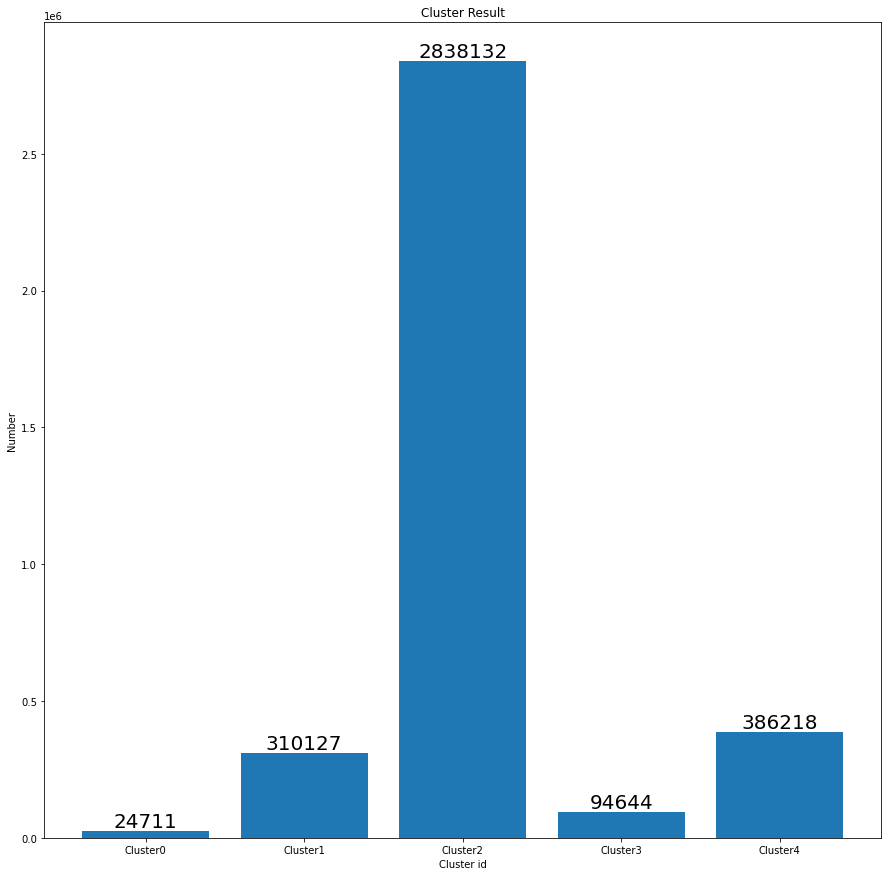

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
cluster_ids = ["Cluster0", "Cluster1", "Cluster2", "Cluster3", "Cluster4"] 
num_list = [24711, 310127, 2838132, 94644, 386218]
plt.bar(cluster_ids, num_list)
plt.xlabel('Cluster id')
plt.ylabel('Number')
plt.title('Cluster Result')

for a,b in zip(cluster_ids,num_list):
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=20)
plt.show()

4.1 计算cluster0的outlier。注意：我并没有排序，所以每次cluster里面的点的个数会不一样，对2800000个点的cluster，需要取1000000个点，并且设立contamination为0.001（经实验测定的比较好的一个treshold），最后得到的outlier个数不会超过1000000x0.001=10000. 运行时间为3min50s。values0就是对应的outlier的点的数据

预计运行时间4m

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
from numpy import where


print(len(cluster2_nodeInfo))
cluster2_nodeInfo2 = cluster2_nodeInfo[0:1000000]
print(len(cluster2_nodeInfo2))
cluster2_nodeInfo2 = np.array(cluster2_nodeInfo2)
lof2 = LocalOutlierFactor(n_neighbors=100, contamination=0.001)
y_pred2 = lof2.fit_predict(cluster2_nodeInfo2)
lofs_index2 = where(y_pred2==-1)
values2 = cluster2_nodeInfo2[lofs_index2]
print(len(values2))
# print(values0)

预计运行时间30s

In [ ]:
cluster1_nodeInfo = np.array(cluster1_nodeInfo)
lof1 = LocalOutlierFactor(n_neighbors=100, contamination=0.001)
y_pred1 = lof1.fit_predict(cluster1_nodeInfo)
lofs_index1 = where(y_pred1==-1)
values1 = cluster1_nodeInfo[lofs_index1]
print(len(values1))
# print(values1)

预计运行时间1s

In [26]:
cluster0_nodeInfo = np.array(cluster0_nodeInfo)
lof0 = LocalOutlierFactor(n_neighbors=100, contamination=0.001)
y_pred0 = lof0.fit_predict(cluster0_nodeInfo)
lofs_index0 = where(y_pred0==-1)
values0 = cluster0_nodeInfo[lofs_index2]
print(len(values0))
# print(values2)

25


预计运行时间50s

In [27]:
cluster3_nodeInfo = np.array(cluster3_nodeInfo)
lof3 = LocalOutlierFactor(n_neighbors=100, contamination=0.001)
y_pred3 = lof3.fit_predict(cluster3_nodeInfo)
lofs_index3 = where(y_pred3==-1)
values3 = cluster3_nodeInfo[lofs_index3]
print(len(values3))
# print(values3)

387


预计运行时间3s

In [ ]:
cluster4_nodeInfo = np.array(cluster4_nodeInfo)
lof4 = LocalOutlierFactor(n_neighbors=100, contamination=0.001)
y_pred4 = lof4.fit_predict(cluster4_nodeInfo)
lofs_index4 = where(y_pred4==-1)
values4 = cluster4_nodeInfo[lofs_index4]
print(len(values4))
# print(values4)

4.2 计算outlier的ip address, 我每个cluster选取了20个outlier，结果就是一共100个outlier，预计运行时间1m20s

In [32]:
outlier0_nodeIP = []
outlier1_nodeIP = []
outlier2_nodeIP = []
outlier3_nodeIP = []
outlier4_nodeIP = []

itr = 0
for v in values0:
    cur_node_ip = get_key(normalized_graph, v)
    outlier0_nodeIP.append(cur_node_ip)
    itr+=1
    if itr == 20:
        break
print(len(outlier0_nodeIP))
print("outlier 0 is :")
print(outlier0_nodeIP)


itr = 0
for v in values1:
    cur_node_ip = get_key(normalized_graph, v)
    outlier1_nodeIP.append(cur_node_ip)
    itr+=1
    if itr == 20:
        break
print(len(outlier1_nodeIP))
print("outlier 1 is :")
print(outlier1_nodeIP)

itr = 0
for v in values2:
    cur_node_ip = get_key(normalized_graph, v)
    outlier2_nodeIP.append(cur_node_ip)
    itr+=1
    if itr == 20:
        break
print(len(outlier2_nodeIP))
print("outlier 2 is :")
print(outlier2_nodeIP)

itr = 0
for v in values3:
    cur_node_ip = get_key(normalized_graph, v)
    outlier3_nodeIP.append(cur_node_ip)
    itr+=1
    if itr == 20:
        break
print(len(outlier3_nodeIP))
print("outlier 3 is :")
print(outlier3_nodeIP)

itr = 0
for v in values4:
    cur_node_ip = get_key(normalized_graph, v)
    outlier4_nodeIP.append(cur_node_ip)
    itr+=1
    if itr == 20:
        break
print(len(outlier4_nodeIP))
print("outlier 4 is :")
print(outlier4_nodeIP)


20
outlier 0 is :
['0x5abef7fc05bce3248a032c4e0d27be3bd4c35936', '0xbcb3fb1b9922725f778d655c25d0b360e2364786', '0xa8c3793ddf8336b5fdd8e93825cfe85f24616c3c', '0x1282a9af1465454343575b972b528242fa8b996c', '0x3780a0b6c0ad0ee23b884c442bc727534e472171', '0x4f5e506c866edebf9a79ef9c6d0db8ba9de95591', '0xfa0e651c86d1ca5e16394714c78854a6ada59593', '0x9d15a52f49e87d79120c291563286252076868a7', '0x64e874ce614013aa5f3ef4c30157e3a88b4f10a0', '0x5bda01660eb908db3dd2e05837cfde530db6663a', '0x8d5fad3b598a769dc338d7f83a328545d11d685a', '0x9167e8b2eed2418fa520c8c036d73cee6b88afe9', '0x8cf23cd535a240eb0ab8667d24eedbd9eccd5cba', '0xf35c0f8469637a2926868733bab012feb55cba17', '0xacd5774a14a5624ed9836c6c7025338cb3b7704b', '0xe57e534886ba455b692ba88d94c26e391362f822', '0x311fdd58a7c367d8c69510e0c38bc1f5964f5613', '0xd19f05e50ba14e87497db30ba8914d393abf2016', '0xf638c9b050a0da1dd9fa0f94b7f73d5bb6af3ef9', '0x4888f074186f62f5245647dd62aecccbdf77f021']
20
outlier 1 is :
['0x6536ec6591d1e1f8d6cfdd6a8d844a655782403

之后需要解决的问题：
1. 与node2vec的整合，下周四会完成与graphVite的整合
2. 解决三百万个点的运行LOF算法时候的内存问题和需要的LOF运行时间
3. 整合visualization部分